# Project Name: Prediction of Heart Attack


## Objective
The objective of this project is to develop a machine learning model that can predict the risk of
a heart attack based on a set of medical and demographic variables. The model will be trained
on historical patient data and will aim to provide accurate predictions to aid healthcare
professionals in assessing patient risk.

    • age: Age of the patient
    • sex: Sex of the patient (1 = male, 0 = female)
    • cp: Chest pain type
    • trestbps: Resting blood pressure (in mm Hg)
    • chol: Serum cholesterol (in mg/dl)
    • fbs: Fasting blood sugar (1 = fasting blood sugar > 120 mg/dl, 0 = otherwise)
    • restecg: Resting electrocardiographic results
    • thalach: Maximum heart rate achieved
    • exang: Exercise-induced angina (1 = yes, 0 = no)
    • oldpeak: ST depression induced by exercise relative to rest
    • slope: Slope of the peak exercise ST segment (0 = upsloping, 1 = flat, 2 = downsloping)
    • ca: Number of major vessels (0-3) colored by fluoroscopy
    • thal: Thalassemia (3 = normal, 6 = fixed defect, 7= reversible defect)
    • target: Target variable (1 = heart attack risk, 0 = no risk)

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
sns.set_style("white")

In [61]:
dfs = pd.read_excel('data.xlsx')

In [62]:
dfs

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
298,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
299,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
300,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [63]:
dfs.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [64]:
dfs.shape

(302, 14)

In [65]:
dfs.isnull().values.any()

False

In [66]:
cat_cols = ['sex','exang','ca','cp','fbs','restecg','slope','thal']
con_cols = ["age","trestbps","chol","thalach","oldpeak"]

print("The categorial cols are : ", cat_cols)
print("The continuous cols are : ", con_cols)


The categorial cols are :  ['sex', 'exang', 'ca', 'cp', 'fbs', 'restecg', 'slope', 'thal']
The continuous cols are :  ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


In [67]:
dfs.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## feature selection


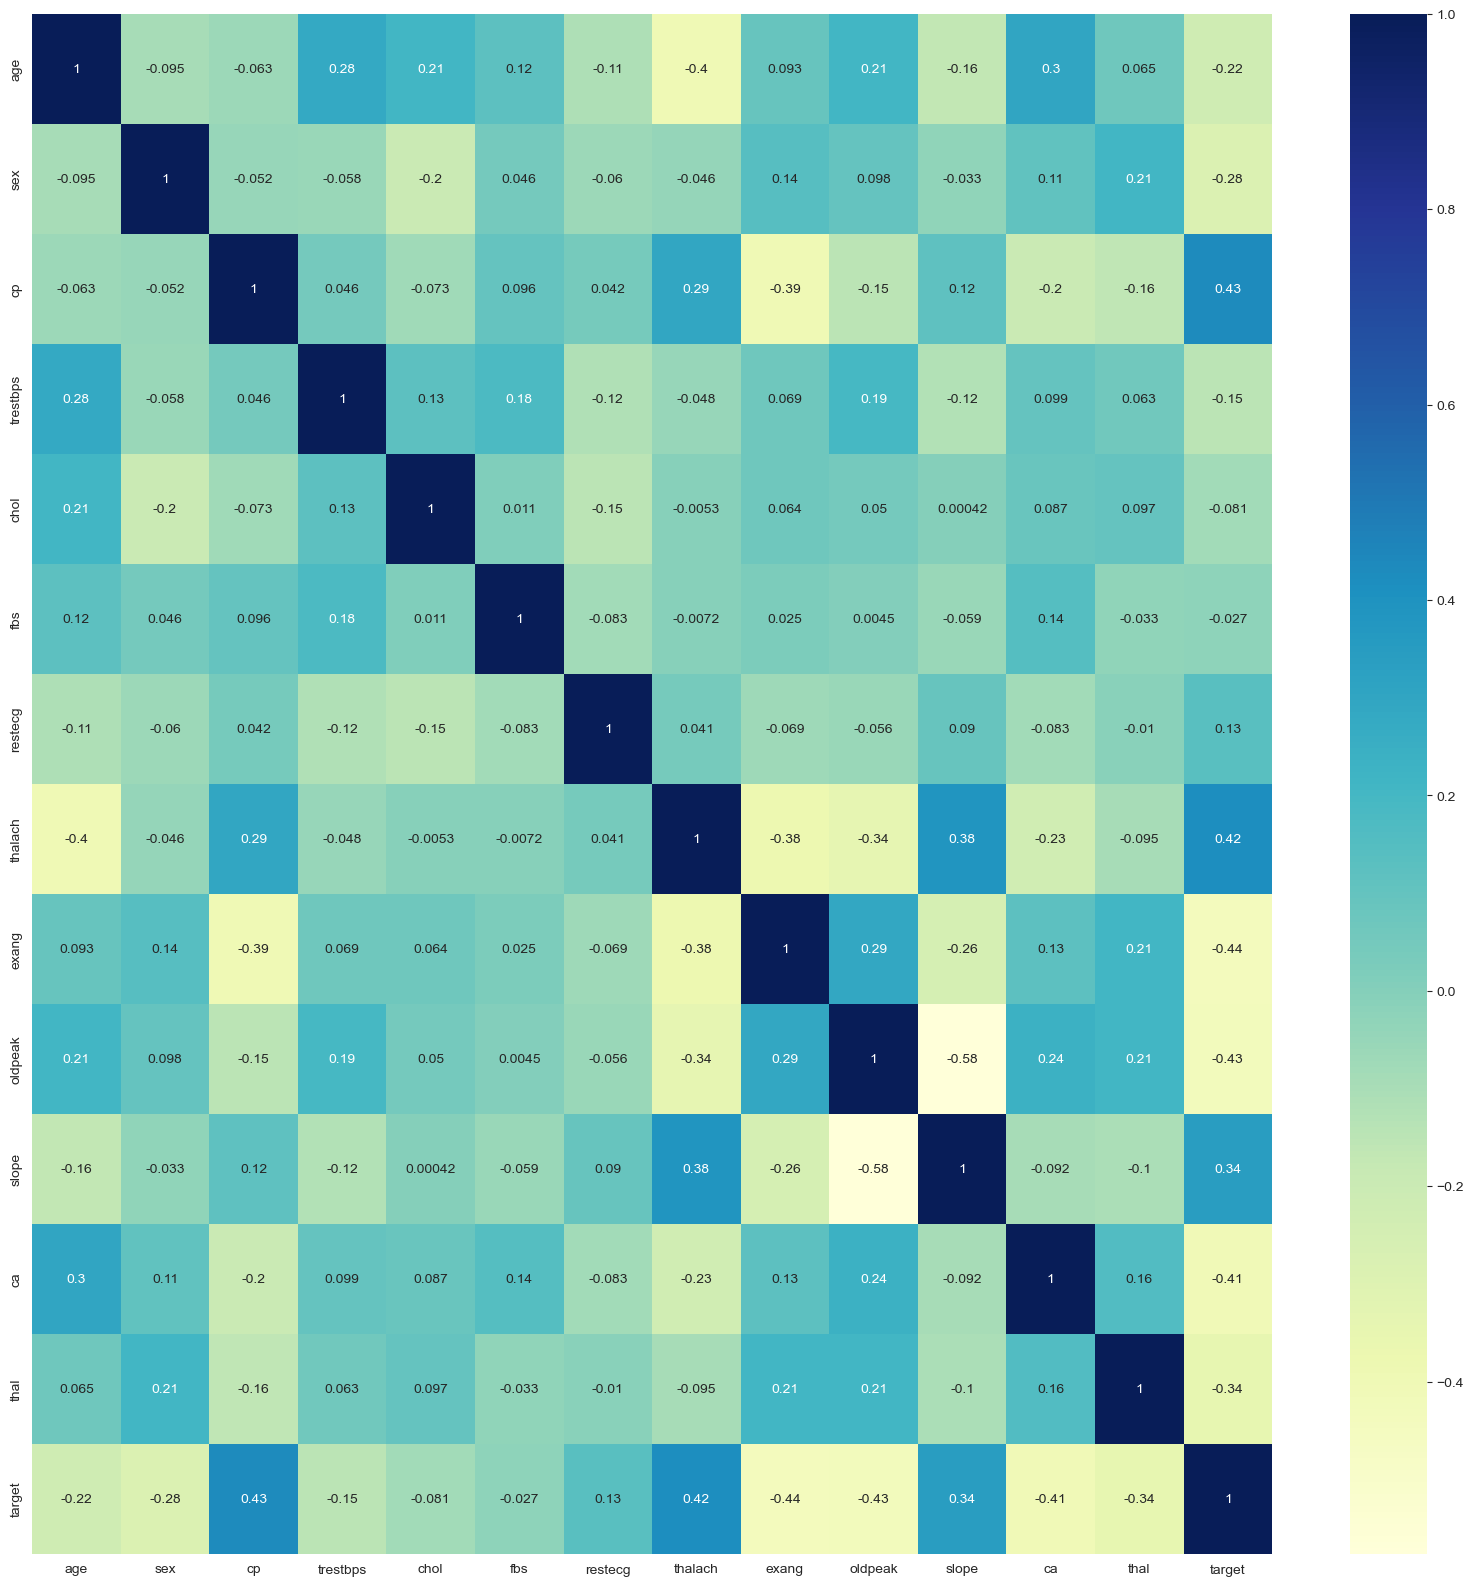

In [68]:
corrmat = dfs.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(dfs[top_corr_features].corr(),annot=True,cmap="YlGnBu")
plt.savefig('hm.jpg')

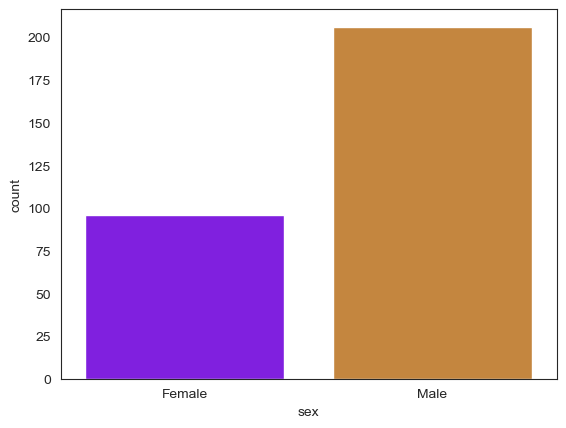

In [69]:
sns.countplot(x='sex', data=dfs, palette=["#8000ff","#da8829"])
plt.xticks ( [0, 1], ['Female', 'Male'] )
plt.savefig('sex.png')
plt.show()


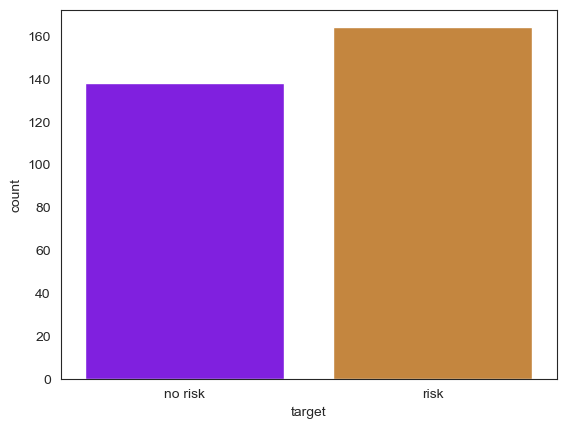

In [94]:
# COUNT OF target
sns.countplot(x='target', data=dfs,palette=["#8000ff","#da8829"])
plt.xticks ( [0, 1], ['no risk', 'risk'] )
plt.savefig('target.png')
plt.show()

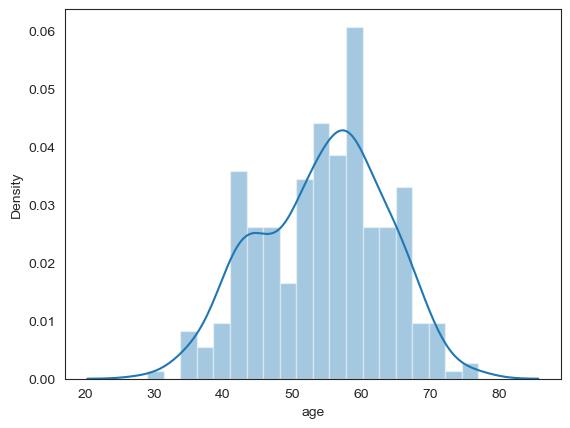

In [71]:
sns.distplot(dfs['age'], bins=20)
plt.savefig('age dist.png')
plt.show()

## Boxen plot of continuous features

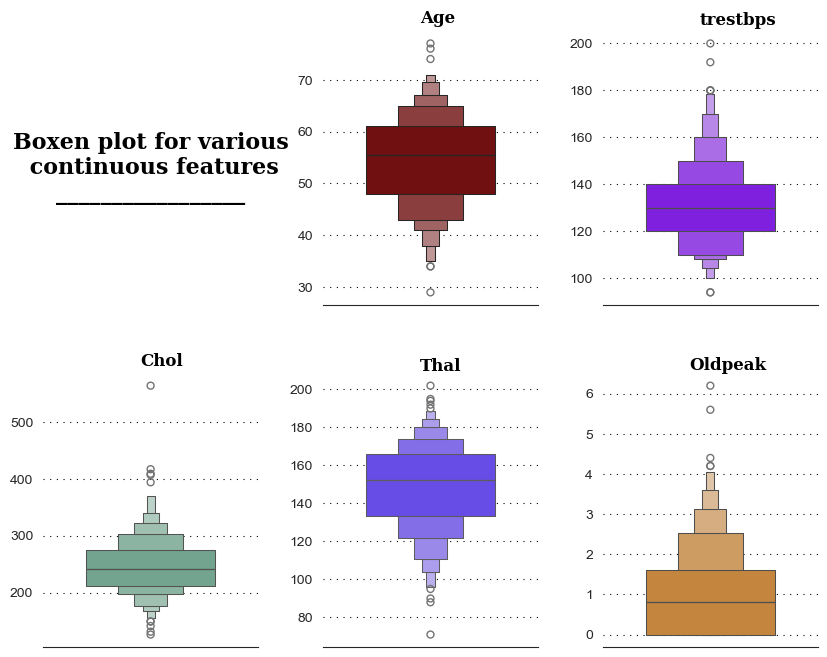

In [72]:
fig = plt.figure(figsize=(10, 8))
gs = fig.add_gridspec(2, 3)
gs.update(wspace=0.3, hspace=0.25)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[1, 2])

background_color = "#ffffff"
color_palette = ["#800000", "#8000ff", "#6aac90", "#5833ff", "#da8829"]
fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color)
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color)

# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5, 0.5,
         'Boxen plot for various\n continuous features\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=16, fontweight='bold',
         fontfamily='serif',
         color="#000000")

# Age
ax1.text(-0.05, 81, 'Age', fontsize=12, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1, 5))
sns.boxenplot(ax=ax1, y=dfs['age'], palette=["#800000"], width=0.6)
ax1.set_xlabel("")
ax1.set_ylabel("")

# trestbps
ax2.text(-0.05, 208, 'trestbps', fontsize=12, fontweight='bold', fontfamily='serif', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1, 5))
sns.boxenplot(ax=ax2, y=dfs['trestbps'], palette=["#8000ff"], width=0.6)
ax2.set_xlabel("")
ax2.set_ylabel("")

# Chol
ax3.text(-0.05, 600, 'Chol', fontsize=12, fontweight='bold', fontfamily='serif', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1, 5))
sns.boxenplot(ax=ax3, y=dfs['chol'], palette=["#6aac90"], width=0.6)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Thalach
ax4.text(-0.05, 210, 'Thal', fontsize=12, fontweight='bold', fontfamily='serif', color="#000000")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1, 5))
sns.boxenplot(ax=ax4, y=dfs['thalach'], palette=["#5833ff"], width=0.6)
ax4.set_xlabel("")
ax4.set_ylabel("")

# oldpeak
ax5.text(-0.1, 6.6, 'Oldpeak', fontsize=12, fontweight='bold', fontfamily='serif', color="#000000")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1, 5))
sns.boxenplot(ax=ax5, y=dfs['oldpeak'], palette=["#da8829"], width=0.6)
ax5.set_xlabel("")
ax5.set_ylabel("")

for s in ["top", "right", "left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)
plt.savefig("1.png")
plt.show()


- Age:
    - The plot shows that most patients are aged around the mid-50s.
    - The distribution indicates a central tendency towards this age range with a few outliers, possibly representing younger or older patients.

- Trestbps (Resting Blood Pressure):
    - The majority of the blood pressure readings fall between 120-140 mm Hg.
    - There are some outliers indicating significantly higher or lower blood pressure levels, suggesting a range of patient conditions from normal to hypertensive.

- Chol (Serum Cholesterol Level):
    - Cholesterol levels predominantly lie between 200-300 mg/dl, indicating a tendency towards borderline to high cholesterol levels.
    - The presence of outliers shows that some patients have exceptionally high cholesterol levels, possibly indicating hypercholesterolemia or related conditions.

- Thal (Thalassemia):
    - The plot indicates a diverse distribution in the Thalassemia variable, possibly reflecting the different types or severities of the condition.
    - The wider spread suggests significant variability in this feature among patients.

- Oldpeak:
    - This feature measures the ST depression induced by exercise relative to rest, a critical indicator in stress testing.
    - Most values are under 2, indicating that the majority of patients do not have severe ST depression, suggesting lower levels of exercise-induced ischemia.

## Count plot of categorical features

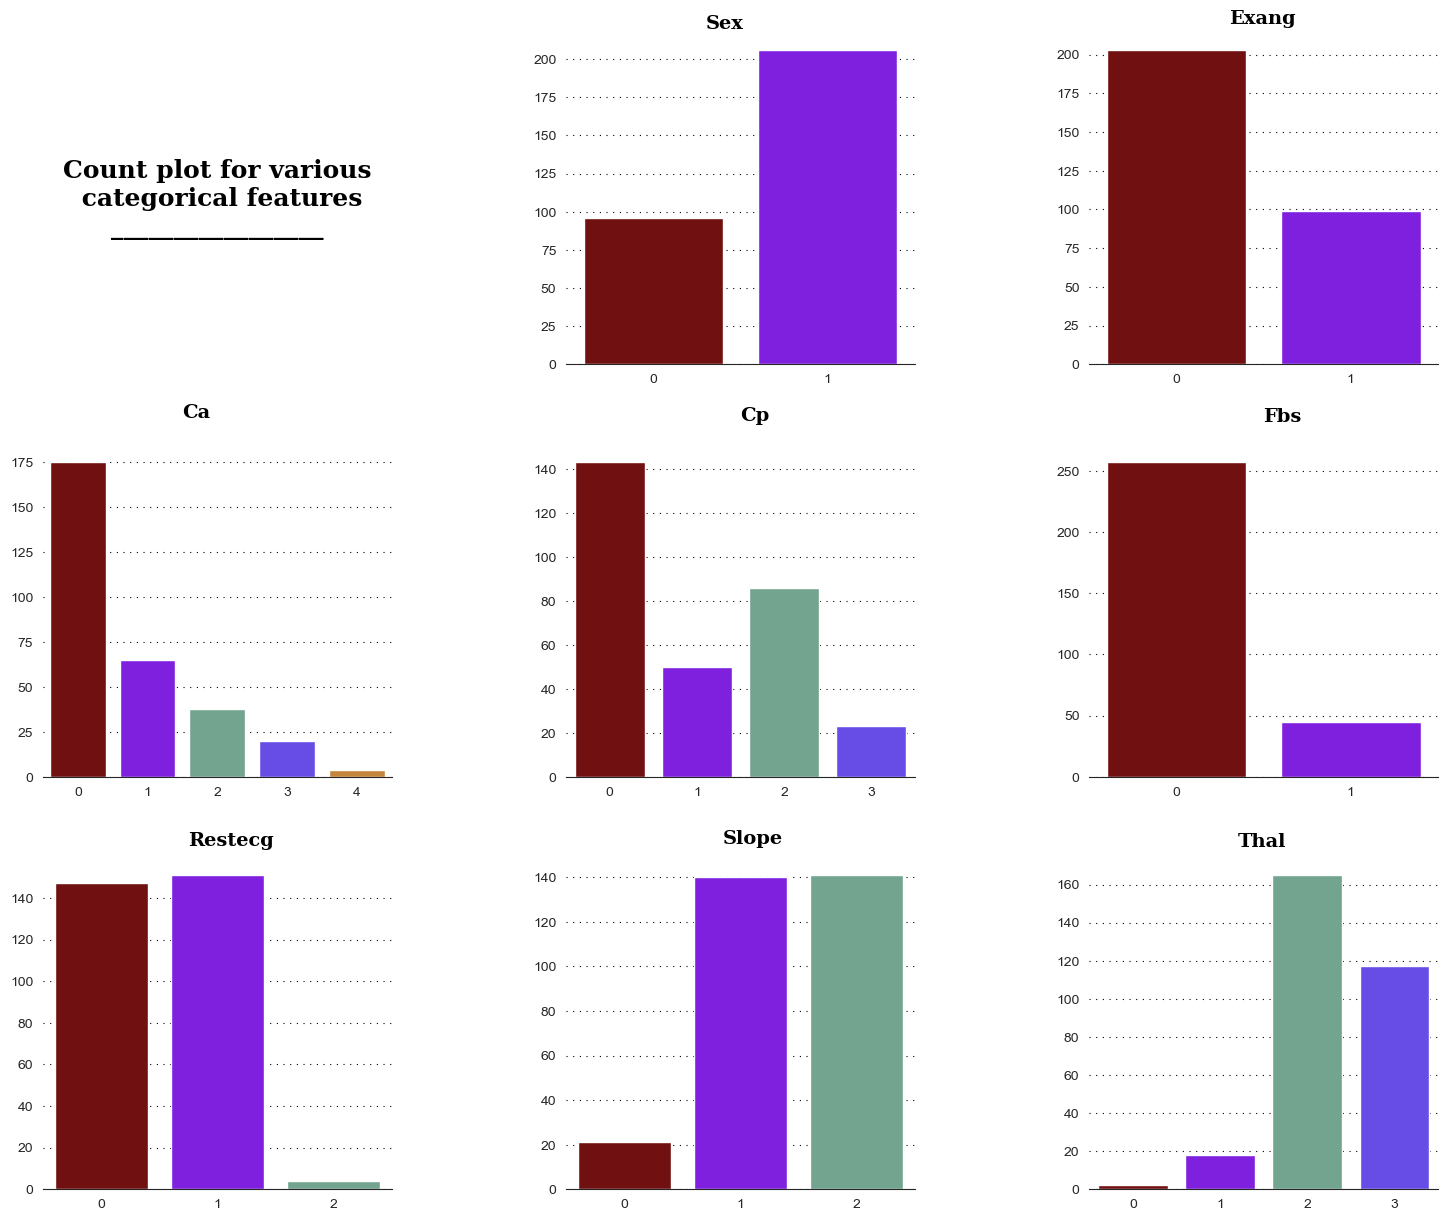

In [73]:
fig = plt.figure(figsize=(18,15))
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.5, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])
ax6 = fig.add_subplot(gs[2,0])
ax7 = fig.add_subplot(gs[2,1])
ax8 = fig.add_subplot(gs[2,2])

background_color = "#ffffff"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color) 
ax3.set_facecolor(background_color) 
ax4.set_facecolor(background_color) 
ax5.set_facecolor(background_color) 
ax6.set_facecolor(background_color) 
ax7.set_facecolor(background_color) 
ax8.set_facecolor(background_color) 

# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Count plot for various\n categorical features\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

# Sex count
ax1.text(0.3, 220, 'Sex', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1,data=dfs,x='sex',palette=color_palette)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Exang count
ax2.text(0.3, 220, 'Exang', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax2,data=dfs,x='exang',palette=color_palette)
ax2.set_xlabel("")
ax2.set_ylabel("")

# Ca count
ax3.text(1.5, 200, 'Ca', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax3,data=dfs,x='ca',palette=color_palette)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Cp count
ax4.text(1.5, 162, 'Cp', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax4,data=dfs,x='cp',palette=color_palette)
ax4.set_xlabel("")
ax4.set_ylabel("")

# Fbs count
ax5.text(0.5, 290, 'Fbs', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax5,data=dfs,x='fbs',palette=color_palette)
ax5.set_xlabel("")
ax5.set_ylabel("")

# Restecg count
ax6.text(0.75, 165, 'Restecg', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax6.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax6,data=dfs,x='restecg',palette=color_palette)
ax6.set_xlabel("")
ax6.set_ylabel("")

# Slope count
ax7.text(0.85, 155, 'Slope', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax7,data=dfs,x='slope',palette=color_palette)
ax7.set_xlabel("")
ax7.set_ylabel("")

# Thal count
ax8.text(1.2, 180, 'Thal', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax8.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax8,data=dfs,x='thal',palette=color_palette)
ax8.set_xlabel("")
ax8.set_ylabel("")

for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)
    ax6.spines[s].set_visible(False)
    ax7.spines[s].set_visible(False)
    ax8.spines[s].set_visible(False)
plt.savefig("2.jpg")
plt.show()

- Sex:
    - There is a higher number of males (1) compared to females (0) in the dataset.

- Exang (Exercise-Induced Angina):
    - The majority of patients do not experience exercise-induced angina, as indicated by the higher count of the '0' category.

- Ca (Number of Major Vessels Colored by Fluoroscopy):
    - Most patients have 0 or 1 major vessel colored, with fewer cases having 2 or more vessels, indicating varying levels of heart disease severity.

- Cp (Chest Pain Type):
    - A significant number of patients experience typical angina (type 0) and atypical angina (type 1), with fewer cases of non-anginal pain (type 2) and asymptomatic (type 3).

- Fbs (Fasting Blood Sugar):
    - The majority of patients have a fasting blood sugar level ≤ 120 mg/dl, with fewer patients exceeding this threshold.

- Restecg (Resting Electrocardiographic Results):
    - Most patients fall into categories 0 and 1, representing normal ECG and some form of abnormality, respectively.

- Slope (Slope of the Peak Exercise ST Segment):
    - The most common slope is 2 (downsloping), followed by slope 1 (flat) and slope 0 (upsloping), which may indicate different types of exercise responses.

- Thal (Thalassemia):
    - A varied distribution across categories, with the normal condition (3) being the most common, followed by fixed (6) and reversible (7) defects, indicating varying levels of thalassemia severity.

In [74]:
df_corr = dfs[con_cols].corr().transpose()
df_corr


,age,trestbps,chol,thalach,oldpeak
age,1.000000,0.283121,0.207216,-0.395235,0.206040
trestbps,0.283121,1.000000,0.125256,-0.048023,0.194600
chol,0.207216,0.125256,1.000000,-0.005308,0.050086
thalach,-0.395235,-0.048023,-0.005308,1.000000,-0.342201
oldpeak,0.206040,0.194600,0.050086,-0.342201,1.000000


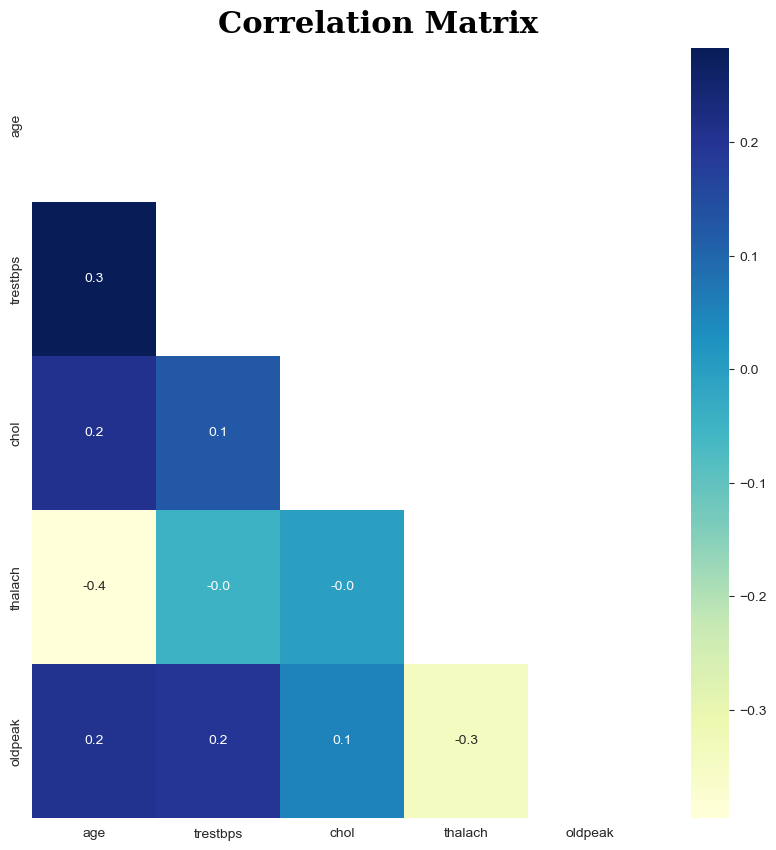

In [75]:
fig = plt.figure(figsize=(10,10))
gs = fig.add_gridspec(1,1)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])

color_palette = ["#5833ff","#da8829"]
mask = np.triu(np.ones_like(df_corr))
ax0.text(1.5,-0.1,"Correlation Matrix",fontsize=22, fontweight='bold', fontfamily='serif', color="#000000")
df_corr = dfs[con_cols].corr().transpose()
sns.heatmap(df_corr,mask=mask,fmt=".1f",annot=True,cmap='YlGnBu')
plt.savefig("com.jpg")
plt.show()

## Scatterplot heatmap of dataframe


<Figure size 1200x1200 with 0 Axes>

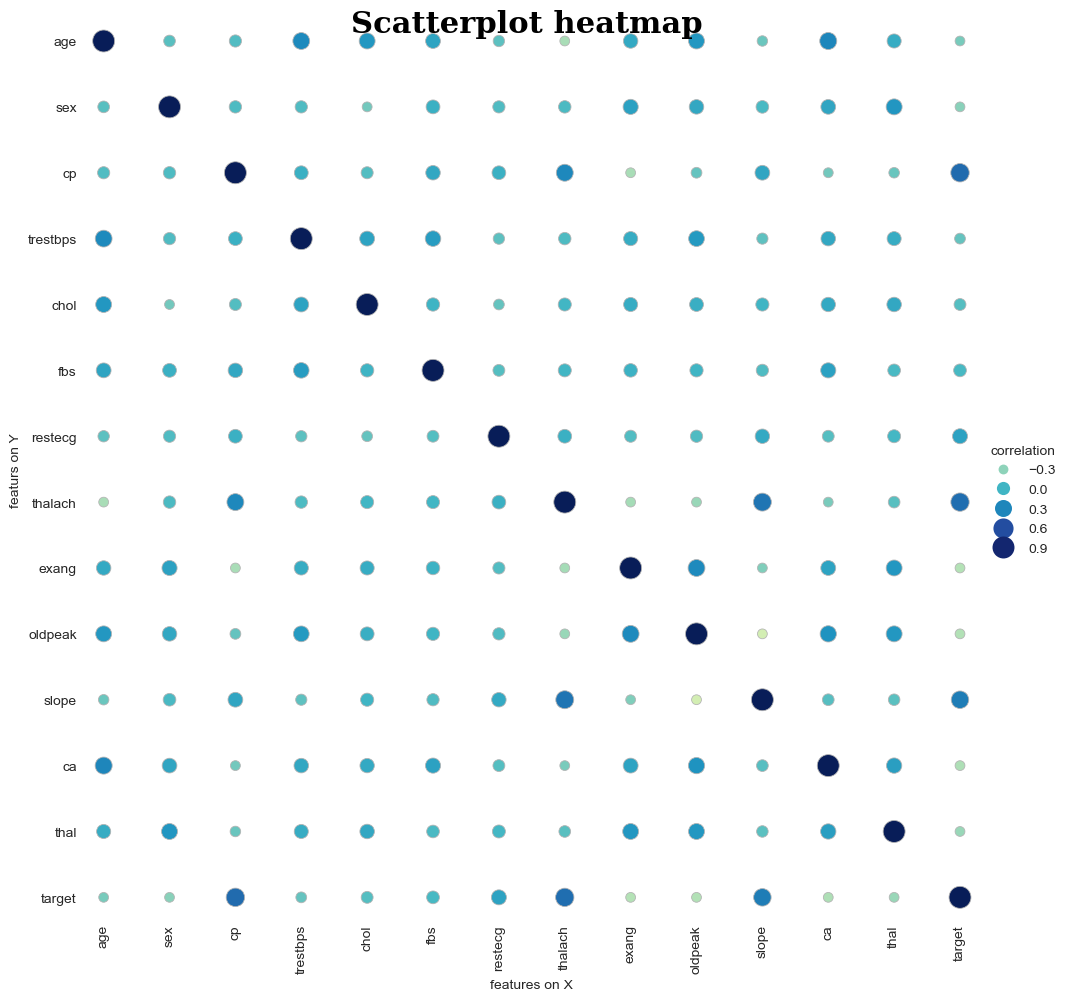

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [76]:
fig = plt.figure(figsize=(12,12))
corr_mat = dfs.corr().stack().reset_index(name="correlation")
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="YlGnBu", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8),
)
g.set(xlabel="features on X", ylabel="featurs on Y", aspect="equal")
g.fig.suptitle('Scatterplot heatmap',fontsize=22, fontweight='bold', fontfamily='serif', color="#000000")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g.legend.legendHandles:
    plt.savefig("scatter.jpg")
    plt.show()

## Distribution of continuous features according to target variable

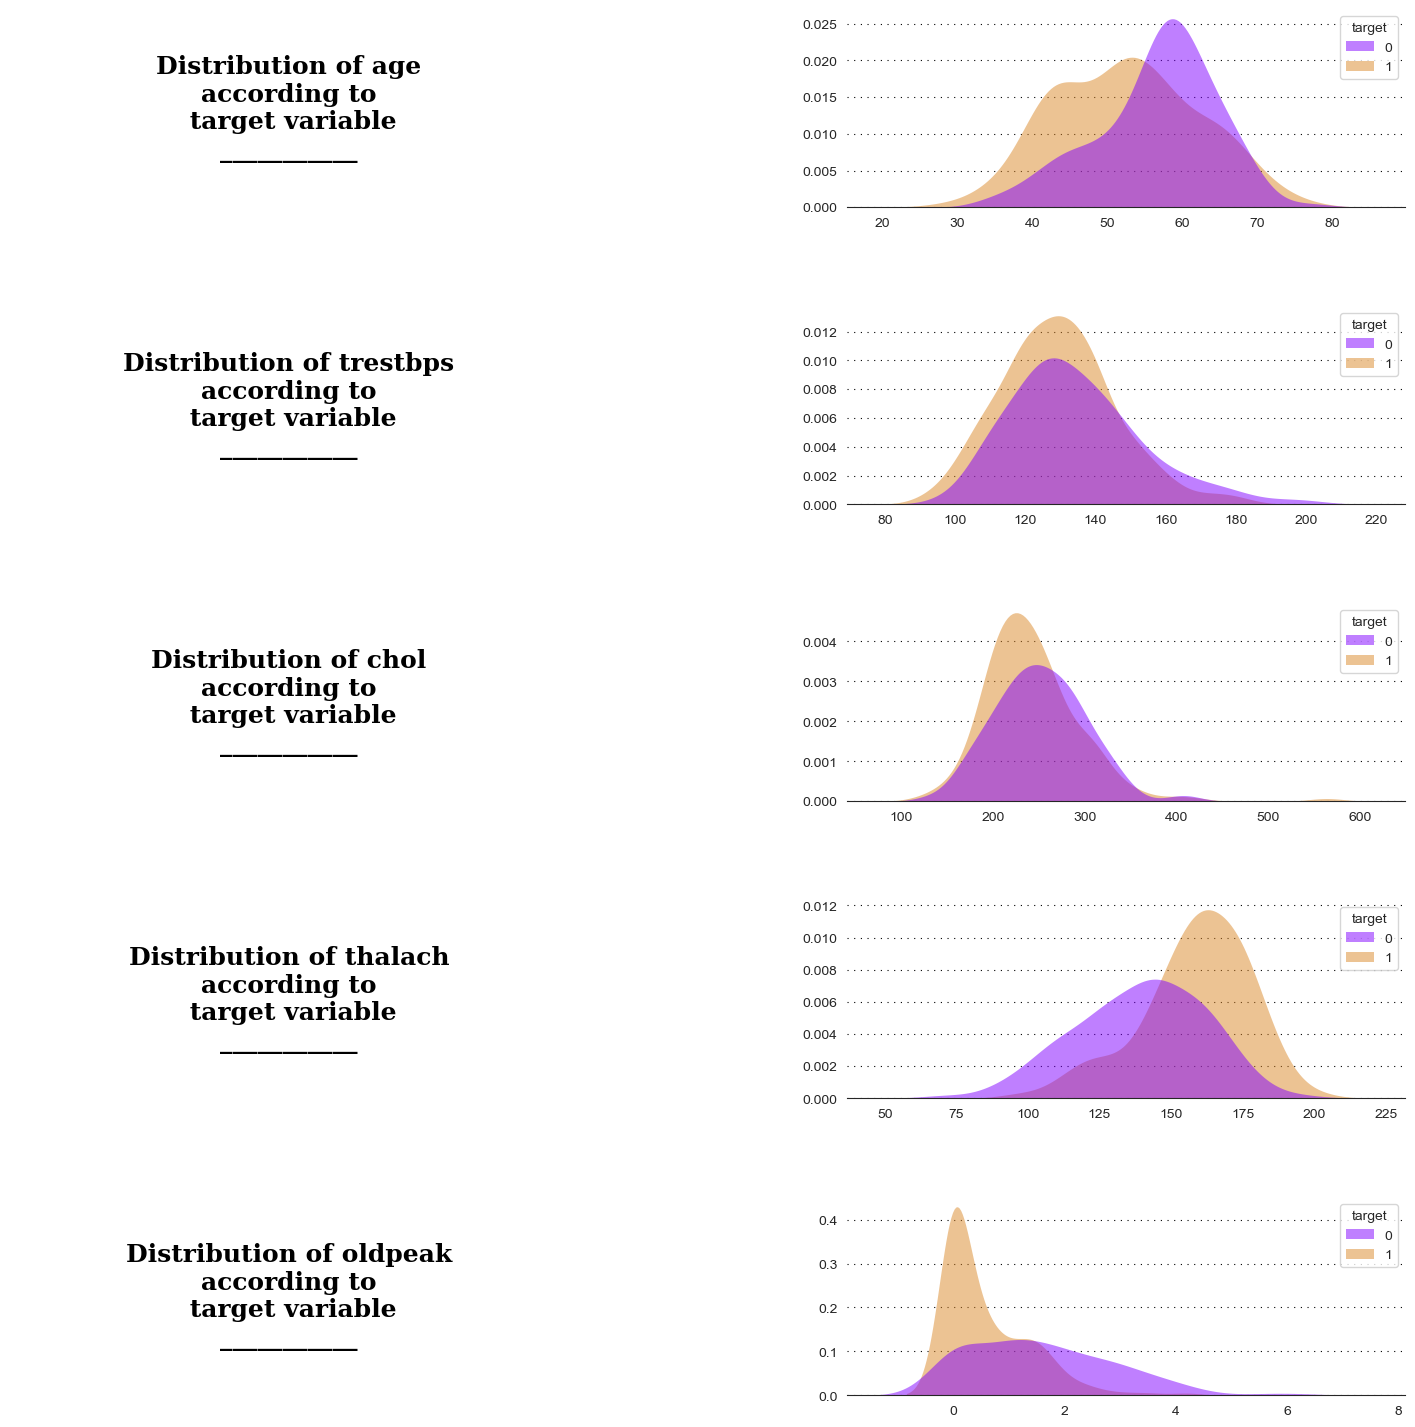

In [79]:
fig = plt.figure(figsize=(18,18))
gs = fig.add_gridspec(5,2)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
ax6 = fig.add_subplot(gs[3,0])
ax7 = fig.add_subplot(gs[3,1])
ax8 = fig.add_subplot(gs[4,0])
ax9 = fig.add_subplot(gs[4,1])

background_color = "#ffffff"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color) 
ax6.set_facecolor(background_color) 
ax7.set_facecolor(background_color)
ax8.set_facecolor(background_color)
ax9.set_facecolor(background_color)

# Age title
ax0.text(0.5,0.5,"Distribution of age\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax0.spines["bottom"].set_visible(False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

# Age
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax1, data=dfs, x='age',hue="target", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax1.set_xlabel("")
ax1.set_ylabel("")

# TrTbps title
ax2.text(0.5,0.5,"Distribution of trestbps\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax2.spines["bottom"].set_visible(False)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.tick_params(left=False, bottom=False)

# TrTbps
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax3, data=dfs, x='trestbps',hue="target", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Chol title
ax4.text(0.5,0.5,"Distribution of chol\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax4.spines["bottom"].set_visible(False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.tick_params(left=False, bottom=False)

# Chol
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax5, data=dfs, x='chol',hue="target", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax5.set_xlabel("")
ax5.set_ylabel("")

# Thalach title
ax6.text(0.5,0.5,"Distribution of thalach\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax6.spines["bottom"].set_visible(False)
ax6.set_xticklabels([])
ax6.set_yticklabels([])
ax6.tick_params(left=False, bottom=False)

# Thalach
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax7, data=dfs, x='thalach',hue="target", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax7.set_xlabel("")
ax7.set_ylabel("")

# Oldpeak title
ax8.text(0.5,0.5,"Distribution of oldpeak\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax8.spines["bottom"].set_visible(False)
ax8.set_xticklabels([])
ax8.set_yticklabels([])
ax8.tick_params(left=False, bottom=False)

# Oldpeak
ax9.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax9, data=dfs, x='oldpeak',hue="target", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax9.set_xlabel("")
ax9.set_ylabel("")

for i in ["top","left","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)
    ax5.spines[i].set_visible(False)
    ax6.spines[i].set_visible(False)
    ax7.spines[i].set_visible(False)
    ax8.spines[i].set_visible(False)
    ax9.spines[i].set_visible(False)
    

- Age Distribution According to Target Variable:

1. Patients aged around 50-60 years have a higher risk of heart attack.
2. Distribution for no-risk patients (target=0) is more spread out across the age range.
3. Risk group (target=1) has a peak around the 50-60 age range.

- Resting Blood Pressure (trestbps) Distribution According to Target Variable:

1. Resting blood pressure values for patients with and without heart attack risk are somewhat similar.
2. Both groups show a peak around 130-150 mm Hg.
3. No-risk group has a slightly wider distribution.

- Cholesterol (chol) Distribution According to Target Variable:

1. Significant overlap between the two groups.
2. Both distributions peak around the 200-250 mg/dL range.
3. Patients with heart attack risk (target=1) have slightly higher values in the 250-300 mg/dL range compared to the no-risk group.

- Maximum Heart Rate Achieved (thalach) Distribution According to Target Variable:

1. Patients with no risk of heart attack (target=0) tend to achieve higher maximum heart rates, peaking around 150-175 bpm.
2. Patients with heart attack risk (target=1) have a slightly lower peak, indicating they generally achieve lower maximum heart rates.

- ST Depression Induced by Exercise (oldpeak) Distribution According to Target Variable:

1. Patients with heart attack risk (target=1) have higher values of ST depression, with a peak around 1-2 units.
2. Distribution for no-risk patients (target=0) is more concentrated near lower values of ST depression, around 0-1 units.
These points summarize how different medical variables are distributed for patients with and without the risk of heart attack, helping to understand the risk factors associated with heart attacks.

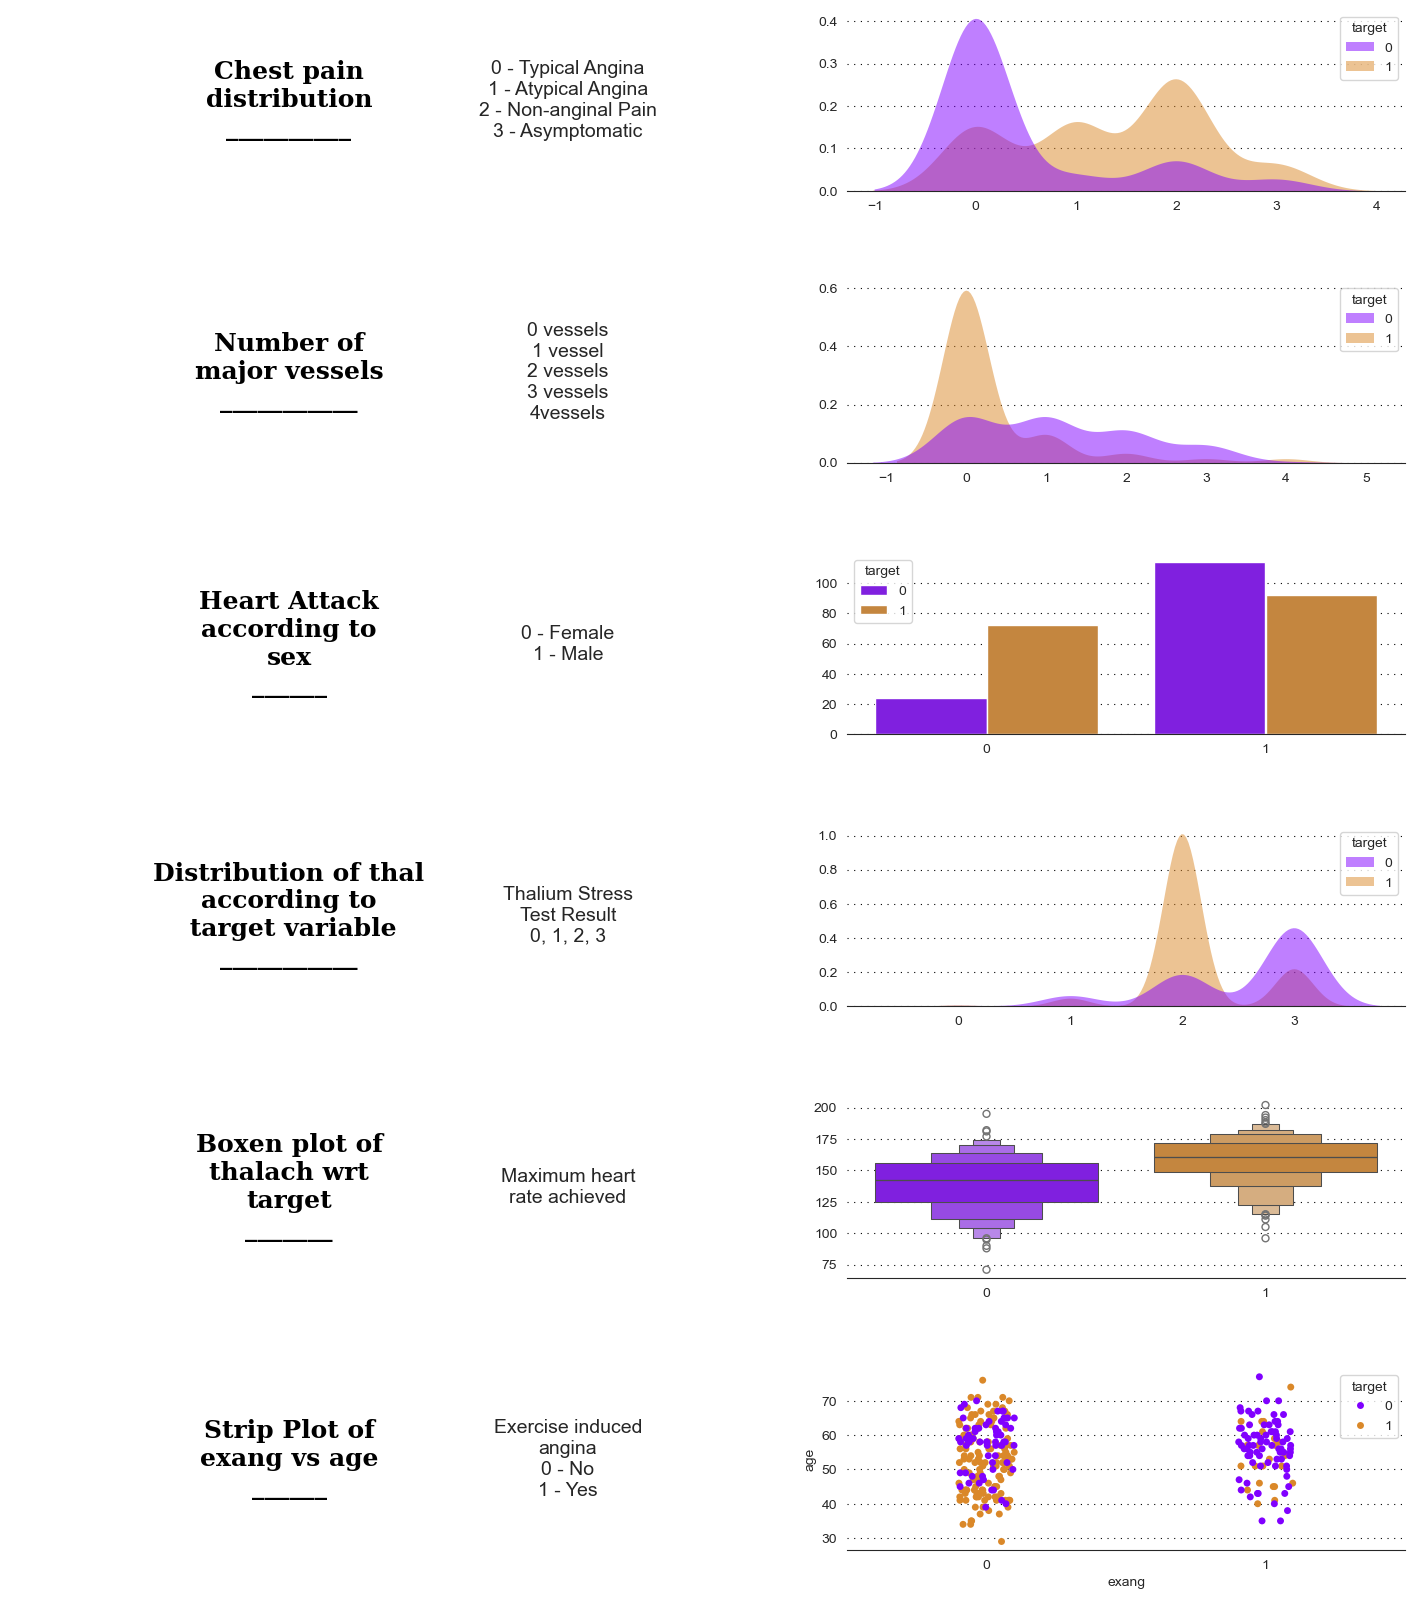

In [80]:
fig = plt.figure(figsize=(18,20))
gs = fig.add_gridspec(6,2)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
ax6 = fig.add_subplot(gs[3,0])
ax7 = fig.add_subplot(gs[3,1])
ax8 = fig.add_subplot(gs[4,0])
ax9 = fig.add_subplot(gs[4,1])
ax10 = fig.add_subplot(gs[5,0])
ax11 = fig.add_subplot(gs[5,1])

background_color = "#ffffff"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color) 
ax6.set_facecolor(background_color) 
ax7.set_facecolor(background_color)
ax8.set_facecolor(background_color)
ax9.set_facecolor(background_color)
ax10.set_facecolor(background_color)
ax11.set_facecolor(background_color)

# Cp title
# 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic
ax0.text(0.5,0.5,"Chest pain\ndistribution\n__________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax0.spines["bottom"].set_visible(False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)
ax0.text(1,.5,"0 - Typical Angina\n1 - Atypical Angina\n2 - Non-anginal Pain\n3 - Asymptomatic",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )

# Cp
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax1, data=dfs, x='cp',hue="target", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Ca title
ax2.text(0.5,0.5,"Number of\nmajor vessels\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax2.text(1,.5,"0 vessels\n1 vessel\n2 vessels\n3 vessels\n4vessels",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )

ax2.spines["bottom"].set_visible(False)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.tick_params(left=False, bottom=False)

# Ca
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax3, data=dfs, x='ca',hue="target", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Sex title
ax4.text(0.5,0.5,"Heart Attack\naccording to\nsex\n______",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax4.text(1,.5,"0 - Female\n1 - Male",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )
ax4.spines["bottom"].set_visible(False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.tick_params(left=False, bottom=False)

# Sex
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax5,data=dfs,x='sex',palette=["#8000ff","#da8829"], hue='target')
ax5.set_xlabel("")
ax5.set_ylabel("")

# Thal title
ax6.text(0.5,0.5,"Distribution of thal\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax6.text(1,.5,"Thalium Stress\nTest Result\n0, 1, 2, 3",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )
ax6.spines["bottom"].set_visible(False)
ax6.set_xticklabels([])
ax6.set_yticklabels([])
ax6.tick_params(left=False, bottom=False)

# Thal
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax7, data=dfs, x='thal',hue="target", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax7.set_xlabel("")
ax7.set_ylabel("")

# Thalach title
ax8.text(0.5,0.5,"Boxen plot of\nthalach wrt\ntarget\n_______",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax8.text(1,.5,"Maximum heart\nrate achieved",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )

ax8.spines["bottom"].set_visible(False)
ax8.set_xticklabels([])
ax8.set_yticklabels([])
ax8.tick_params(left=False, bottom=False)

# Thalach
ax9.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax9, data=dfs,x='target',y='thalach',palette=["#8000ff","#da8829"])
ax9.set_xlabel("")
ax9.set_ylabel("")



# Exang title
ax10.text(0.5,0.5,"Strip Plot of\nexang vs age\n______",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax10.text(1,.5,"Exercise induced\nangina\n0 - No\n1 - Yes",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )
ax10.spines["bottom"].set_visible(False)
ax10.set_xticklabels([])
ax10.set_yticklabels([])
ax10.tick_params(left=False, bottom=False)


# Exang
ax11.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.stripplot(ax=ax11, data=dfs,x='exang',y='age',hue='target',palette=["#8000ff","#da8829"])
ax9.set_xlabel("")
ax9.set_ylabel("")

for i in ["top","left","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)
    ax5.spines[i].set_visible(False)
    ax6.spines[i].set_visible(False)
    ax7.spines[i].set_visible(False)
    ax8.spines[i].set_visible(False)
    ax9.spines[i].set_visible(False)
    ax10.spines[i].set_visible(False)
    ax11.spines[i].set_visible(False)
   

- People with Non-Anginal chest pain, that is with cp = 2 have higher chances of heart attack.
- People with 0 major vessels, that is with ca = 0 have high chance of heart attack.
- People with sex = 1 have higher chance of heart attack.
- People with thal = 2 have much higher chance of heart attack.
- People with no exercise induced angina, that is with exang = 0 have higher chance of heart attack.

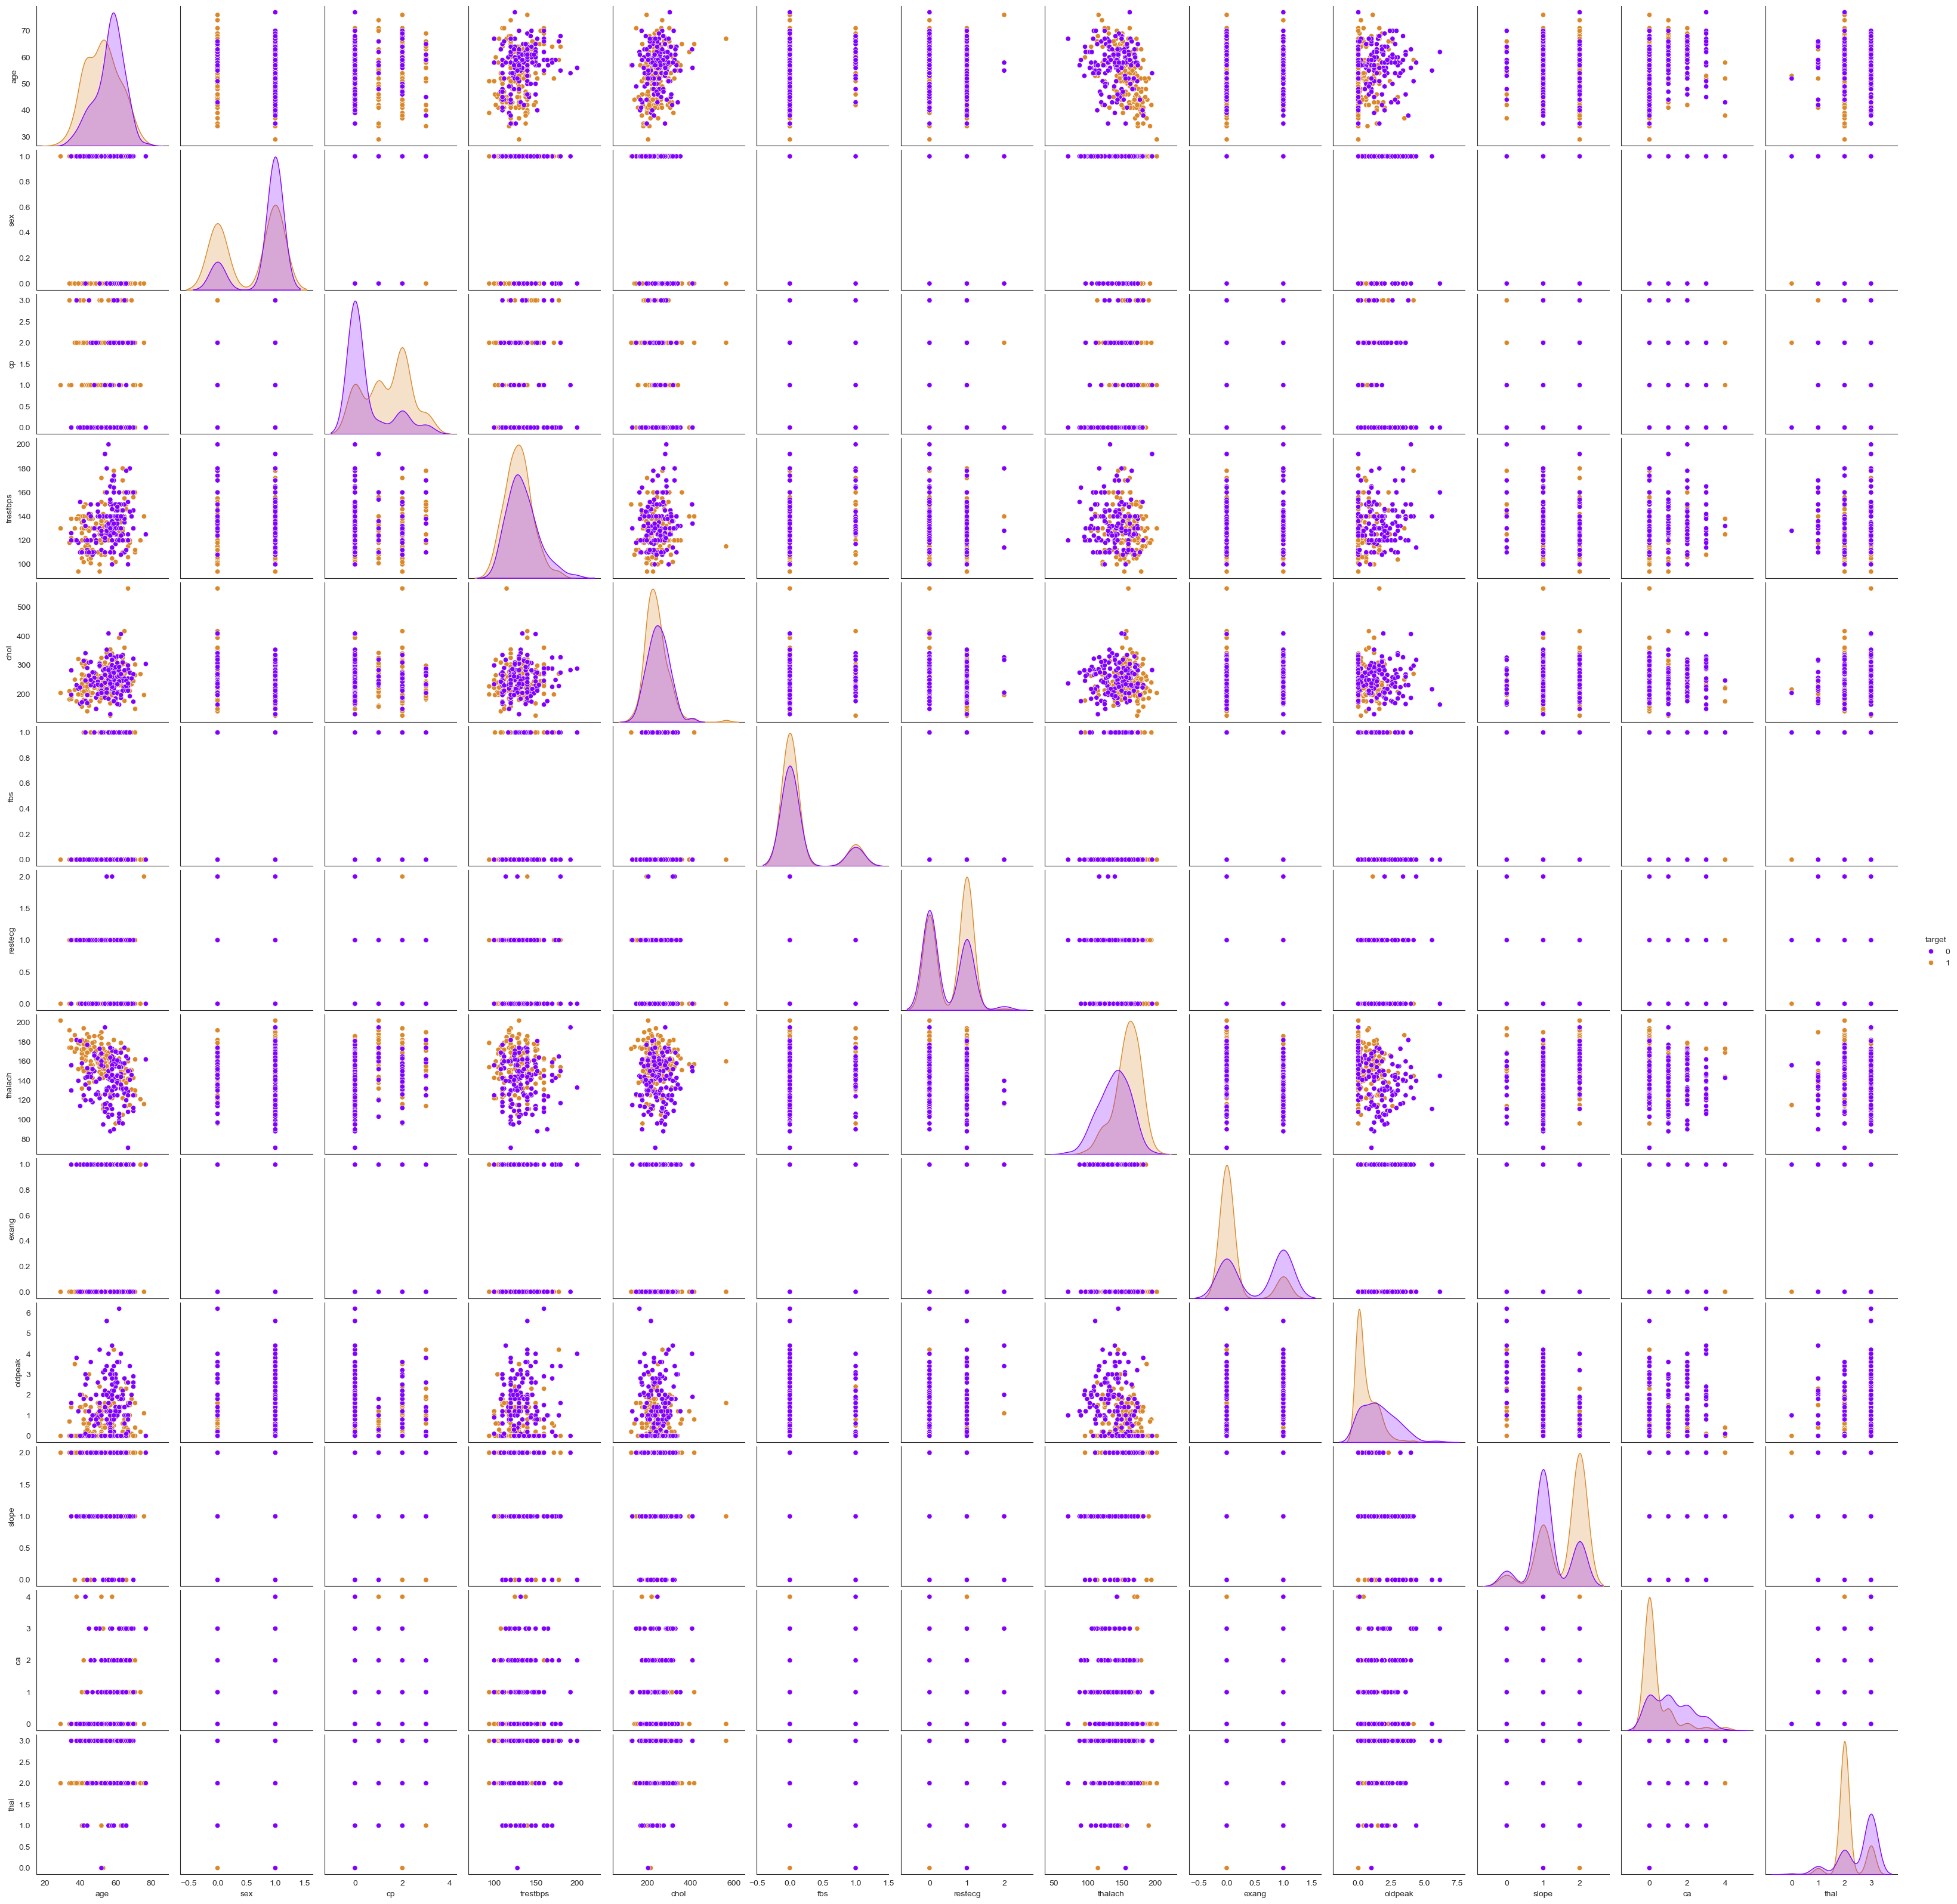

In [92]:
sns.pairplot(dfs,hue='target',palette = ["#8000ff","#da8829"])

plt.show()

## Conclusions from the EDA
1. There are no NaN values in the data.
2. There are certain outliers in all the continuous features.
3. The data consists of more than twice the number of people with sex = 1 than sex = 0.
4. There is no apparent linear correlation between continuous variable according to the heatmap.
5. The scatterplot heatmap matrix suggests that there might be some correlation between output and cp, thalach and slope.
6. It is intuitive that elder people might have higher chances of heart attack but according to the distribution plot of age wrt output, it is evident that this isn't the case.
7. According to the distribution plot of thalach wrt output, people with higher maximum heart rate achieved have higher chances of heart attack.
8. According to the distribution plot of oldpeak wrt output, people with lower pevious peak achieved have higher chances of heart attack.

## Packages


In [95]:
# Scaling
from sklearn.preprocessing import RobustScaler

# Train Test Split
from sklearn.model_selection import train_test_split

# Models

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Metrics
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

print('Packages imported...')

Packages imported...


In [83]:
# creating a copy of df
df1 = dfs

# define the columns to be encoded and scaled
cat_cols = ['sex','exang','ca','cp','fbs','restecg','slope','thal']
con_cols = ["age","trestbps","chol","thalach","oldpeak"]

# encoding the categorical columns
df1 = pd.get_dummies(df1, columns = cat_cols, drop_first = True)

# defining the features and target
X = df1.drop(['target'],axis=1)
y = df1[['target']]

# instantiating the scaler
scaler = RobustScaler()

# scaling the continuous featuree
X[con_cols] = scaler.fit_transform(X[con_cols])
print("The first 5 rows of X are")
X.head()

The first 5 rows of X are


,age,trestbps,chol,thalach,oldpeak,sex_1,exang_1,ca_1,ca_2,ca_3,...,cp_2,cp_3,fbs_1,restecg_1,restecg_2,slope_1,slope_2,thal_1,thal_2,thal_3
0,0.576923,0.75,-0.117647,-0.076336,0.9375,True,False,False,False,False,...,False,True,True,False,False,False,False,True,False,False
1,-1.423077,0.00,0.149020,1.053435,1.6875,True,False,False,False,False,...,True,False,False,True,False,False,False,False,True,False
2,-1.115385,0.00,-0.572549,0.595420,0.3750,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
3,0.038462,-0.50,-0.070588,0.778626,0.0000,True,False,False,False,False,...,False,False,False,True,False,False,True,False,True,False
4,0.115385,-0.50,1.780392,0.320611,-0.1250,False,True,False,False,False,...,False,False,False,True,False,False,True,False,True,False


In [84]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
print("The shape of X_train is      ", X_train.shape)
print("The shape of X_test is       ",X_test.shape)
print("The shape of y_train is      ",y_train.shape)
print("The shape of y_test is       ",y_test.shape)

The shape of X_train is       (241, 22)
The shape of X_test is        (61, 22)
The shape of y_train is       (241, 1)
The shape of y_test is        (61, 1)


## Support Vector Machines

In [98]:
clf = SVC(kernel='linear', C=1, random_state=42).fit(X_train,y_train)

# predicting the values
y_pred = clf.predict(X_test)

# printing the test accuracy


print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred):.2f}")
print(f"Recall: {recall_score(y_test, y_pred):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.2f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_scores):.2f}")

Accuracy: 0.84
Precision: 0.87
Recall: 0.81
F1 Score: 0.84
ROC AUC: 0.93


## Hyperparameter tuning of SVC

In [86]:
# instantiating the object
svm = SVC()

# setting a grid - not so extensive
parameters = {"C":np.arange(1,10,1),'gamma':[0.00001,0.00005, 0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1,5]}

# instantiating the GridSearchCV object
searcher = GridSearchCV(svm, parameters)

# fitting the object
searcher.fit(X_train, y_train)

# the scores
print("The best params are :", searcher.best_params_)
print("The best score is   :", searcher.best_score_)

# predicting the values
y_pred = searcher.predict(X_test)

# printing the test accuracy
print("The test accuracy score of SVM after hyper-parameter tuning is ", accuracy_score(y_test, y_pred))


The best params are : {'C': 5, 'gamma': 0.05}
The best score is   : 0.8586734693877551
The test accuracy score of SVM after hyper-parameter tuning is  0.9016393442622951


## Logistic Regression


In [99]:
# instantiating the object
logreg = LogisticRegression()

# fitting the object
logreg.fit(X_train, y_train)

# calculating the probabilities
y_pred_proba = logreg.predict_proba(X_test)

# finding the predicted valued
y_pred = np.argmax(y_pred_proba,axis=1)

# printing the test accuracy
print("The test accuracy score of Logistric Regression is ", accuracy_score(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred):.2f}")
print(f"Recall: {recall_score(y_test, y_pred):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.2f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_scores):.2f}")

The test accuracy score of Logistric Regression is  0.9016393442622951
Accuracy: 0.90
Precision: 0.93
Recall: 0.88
F1 Score: 0.90
ROC AUC: 0.93


ROC Curve

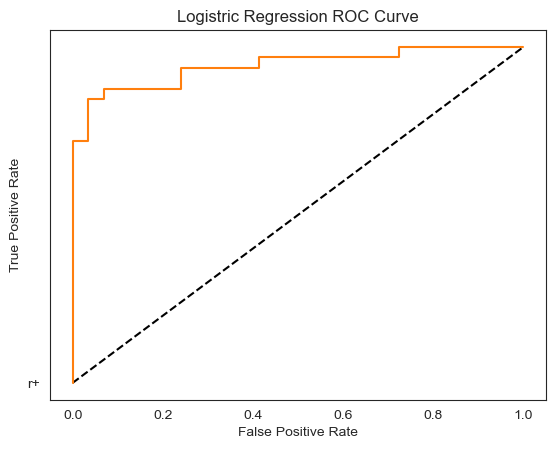

In [88]:
# calculating the probabilities
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# instantiating the roc_cruve
fpr,tpr,threshols=roc_curve(y_test,y_pred_prob)

# plotting the curve
plt.plot([0,1],[0,1],"k--",'r+')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistric Regression ROC Curve")
plt.show()

## Tree Models

## Decision Tree

In [100]:
# instantiating the object
dt = DecisionTreeClassifier(random_state = 42)

# fitting the model
dt.fit(X_train, y_train)

# calculating the predictions
y_pred = dt.predict(X_test)

# printing the test accuracy
print("The test accuracy score of Decision Tree is ", accuracy_score(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred):.2f}")
print(f"Recall: {recall_score(y_test, y_pred):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.2f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_scores):.2f}")

The test accuracy score of Decision Tree is  0.7213114754098361
Accuracy: 0.72
Precision: 0.80
Recall: 0.62
F1 Score: 0.70
ROC AUC: 0.93


## Random Forest

In [101]:
# instantiating the object
rf = RandomForestClassifier()

# fitting the model
rf.fit(X_train, y_train)

# calculating the predictions
y_pred = dt.predict(X_test)

# printing the test accuracy
print("The test accuracy score of Random Forest is ", accuracy_score(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred):.2f}")
print(f"Recall: {recall_score(y_test, y_pred):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.2f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_scores):.2f}")

The test accuracy score of Random Forest is  0.7213114754098361
Accuracy: 0.72
Precision: 0.80
Recall: 0.62
F1 Score: 0.70
ROC AUC: 0.93


## Gradient Boosting Classifier - without tuning

In [102]:
# instantiate the classifier
gbt = GradientBoostingClassifier(n_estimators = 300,max_depth=1,subsample=0.8,max_features=0.2,random_state=42)

# fitting the model
gbt.fit(X_train,y_train)

# predicting values
y_pred = gbt.predict(X_test)
print("The test accuracy score of Gradient Boosting Classifier is ", accuracy_score(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred):.2f}")
print(f"Recall: {recall_score(y_test, y_pred):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.2f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_scores):.2f}")

The test accuracy score of Gradient Boosting Classifier is  0.8852459016393442
Accuracy: 0.89
Precision: 0.90
Recall: 0.88
F1 Score: 0.89
ROC AUC: 0.93
